# Lead Scoring Analysis and Prediction - Data cleaning

## Import data and required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
lead_data = pd.read_csv("/Users/0s/Downloads/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_data.shape

(9240, 37)

There are 9420 rows and 37 columns in the lead dataset.

In [4]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

The data types of the columns are float, integer and object type. We can see there are some null values in the column.

In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_data.describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000,13.000000,15.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000


There are some outliers present in a few columns like: TotalVisits, Total Time Spent on Website, Page Views Per Visit.

### Checking the percentage of missing values

In [7]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Out of 37 columns present in the dataset, null values appear in 17 columns. 10 of them have more than 25% of the null values.

### Checking if there are columns with one unique value since it won't affect our analysis.

In [9]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

- The 'Prospect ID' and 'Lead Number' columns are unique, therefore they can be deleted as it cannot be used for prediction.
- Columns: 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' have only one unique value. Then they can be dropped.

### Conversion rate

In [10]:
round(lead_data["Converted"].sum()/len(lead_data),4)*100

38.54

Conversion rate is 38.54%.

### Imbalance ratio

In [11]:
round(len(lead_data[lead_data["Converted"]==0])/len(lead_data[lead_data["Converted"]==1]),4)

1.5948

Imbalance ratio is 1.5948

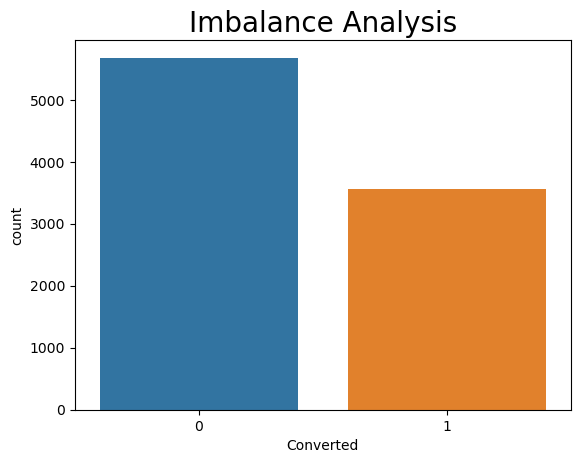

In [12]:
plt.title('Imbalance Analysis', fontsize=20)
sns.countplot(data=lead_data, x='Converted')
plt.show()

## Data cleaning

There are 'Select' values for many columns. This is because a customer did not select any option from the list, therefore it shows select by default.

In [13]:
# Converting 'Select' values to NaN

lead_data = lead_data.replace('Select', np.nan)

In [15]:
# Dropping the duplicate rows

lead_data = lead_data.drop_duplicates()

In [16]:
# Checking the percentage of missing values

round(100*(lead_data.isnull().sum()/len(lead_data.index)),2).sort_values(ascending=False).head(18)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
dtype: flo

In [17]:
# Dropping columns with a certain percentage of NaN values

def drop_missing_data_columns(data, miss_per):
    cols_to_drop = list(round(100*(data.isnull().sum()/len(data.index)),2) >= miss_per)
    dropped_cols = data.loc[:,cols_to_drop].columns
    print("Columns with more than {}% of missing values are: {}".format(miss_per, dropped_cols))
    data = data.drop(dropped_cols,axis=1)
    return data

In [18]:
data = drop_missing_data_columns(lead_data, 40)

Columns with more than 40% of missing values are: Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


In [19]:
data.shape

(9240, 30)

7 columns were removed which were having more than 40% of missing values.

In [21]:
# Checking the percentage of missing values on remaining columns

round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [22]:
# List all numeric and non-numeric columns

non_num_cols = list(data.select_dtypes(include="object"))
num_cols = list(data.select_dtypes(exclude="object"))

### Categorical columns

In [23]:
print("Column: Unique values")
for col in non_num_cols:
    print("-"*50)
    print("{}: {}".format(col, data[col].nunique()))

Column: Unique values
--------------------------------------------------
Prospect ID: 9240
--------------------------------------------------
Lead Origin: 5
--------------------------------------------------
Lead Source: 21
--------------------------------------------------
Do Not Email: 2
--------------------------------------------------
Do Not Call: 2
--------------------------------------------------
Last Activity: 17
--------------------------------------------------
Country: 38
--------------------------------------------------
Specialization: 18
--------------------------------------------------
What is your current occupation: 6
--------------------------------------------------
What matters most to you in choosing a course: 3
--------------------------------------------------
Search: 2
--------------------------------------------------
Magazine: 1
--------------------------------------------------
Newspaper Article: 2
--------------------------------------------------
X Educat

### Numerical columns

In [25]:
for col in non_num_cols:
    if(col=="Prospect ID"):
        pass
    else:
        print("-"*50)
        print(col)
        print(data[col].value_counts())

--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
--------------------------------------------------
Do Not Email
No     8506
Yes     734
Name: Do Not Ema

In [26]:
# Identifying the constant features

const = []
for col in list(data.columns):
    if data[col].unique().size < 2:
        const.append(col)
print(const)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [27]:
def count_plot_converted(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue="Converted", data=data)
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

## Solving missing values

### Country

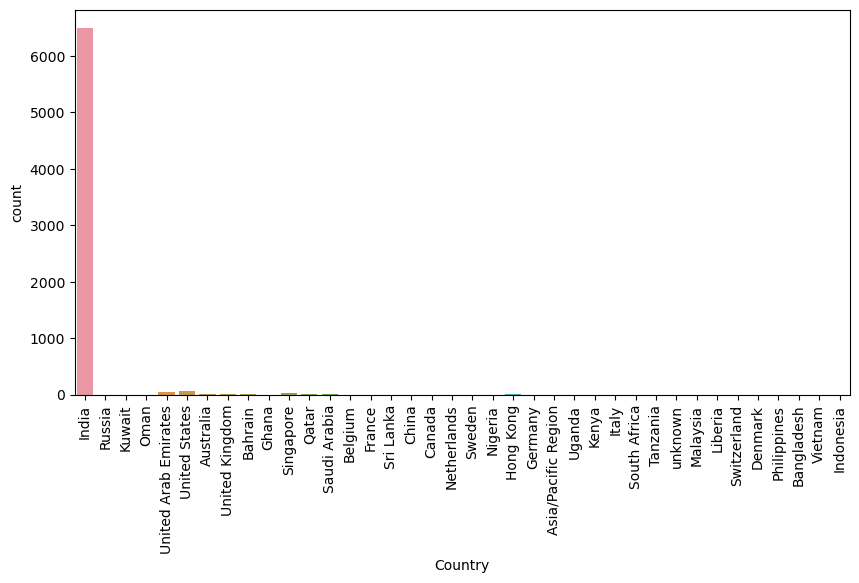

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Country'])
plt.xticks(rotation = 90)
plt.show()

- More than 90% of the values are India in 'Country' column.
- Country data is not required for Model building as X Education is online platform. We will drop the country column.

In [30]:
data = data.drop('Country',axis=1)

### City

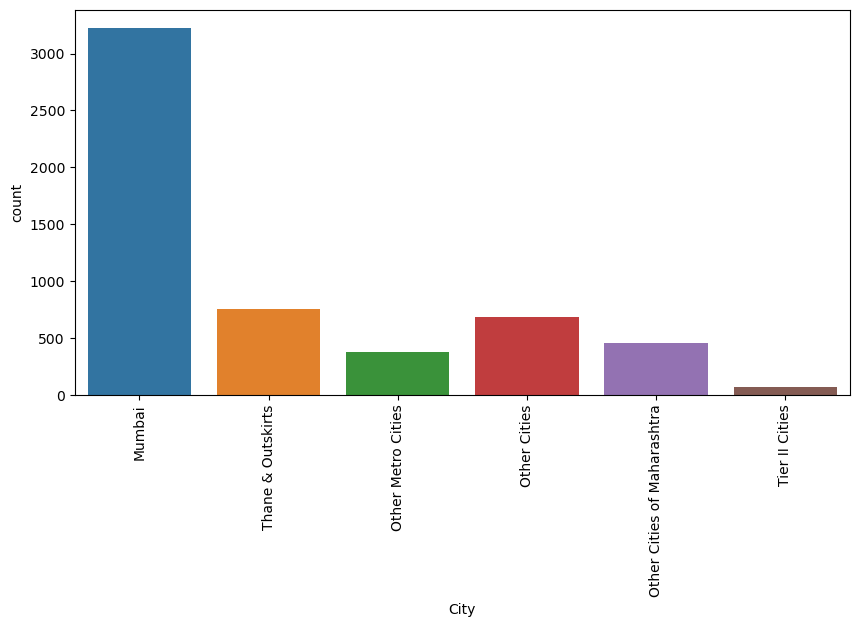

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['City'])
plt.xticks(rotation=90)
plt.show()

In [32]:
data['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

Nearly 60% of the data are Mumbai, so we can impute Mumbai in those missing values.

In [33]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

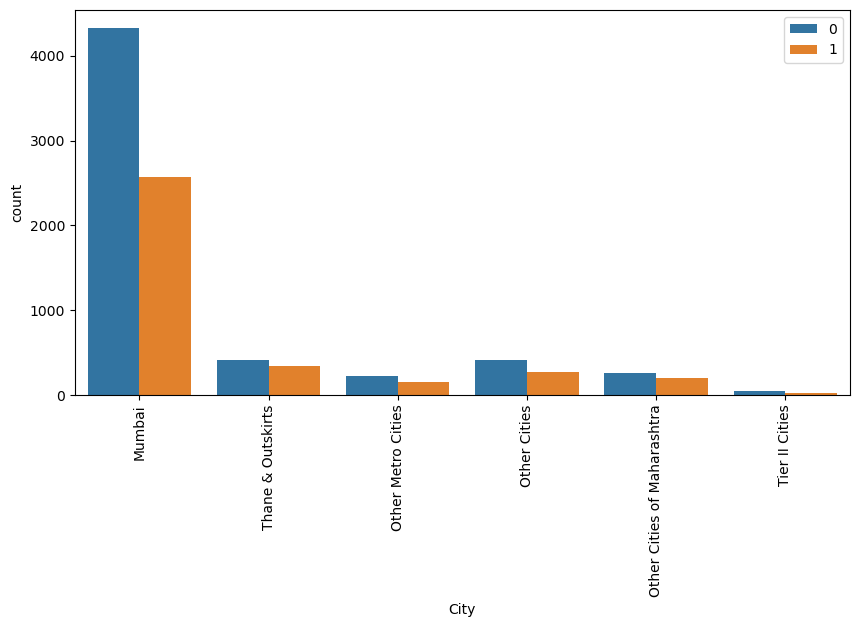

In [34]:
count_plot_converted(data.City)

The majority of conversion is also from Mumbai.

In [35]:
data['City'].value_counts(normalize=True)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

- We cannot impute with mode as it will make the whole dataset skewed.
- Also, X Education is online teaching platform.
- Then the city information will not be much useful as potential students can learn these course anywhere.

In [36]:
data.drop("City",axis=1,inplace=True)

### Specialization

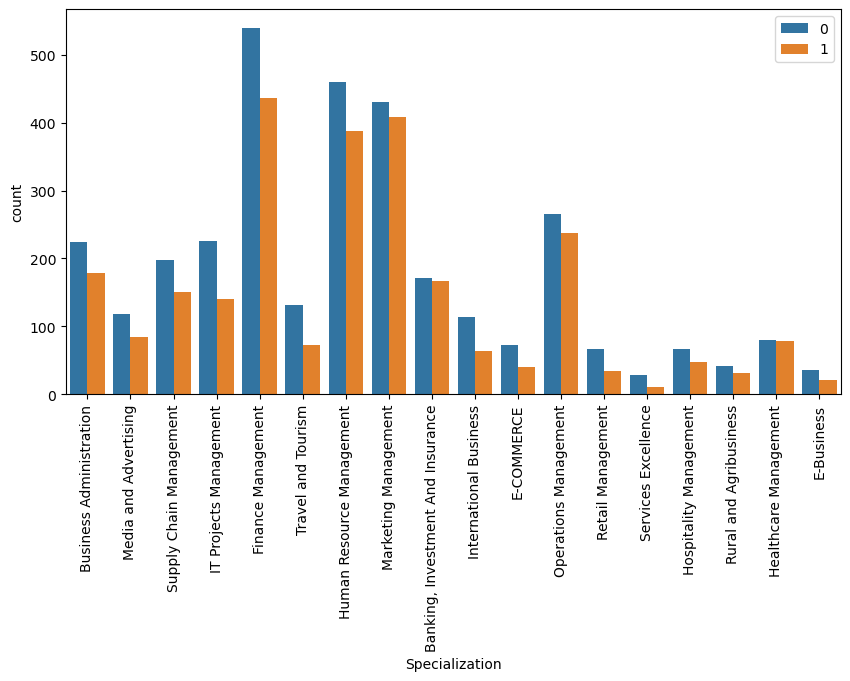

In [37]:
count_plot_converted(data.Specialization)

- Lead did not enter any specialization if his/her option is either not available on the list or is a student.
- Therefore, we can make a category 'Not Specified' for missing values.

In [38]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

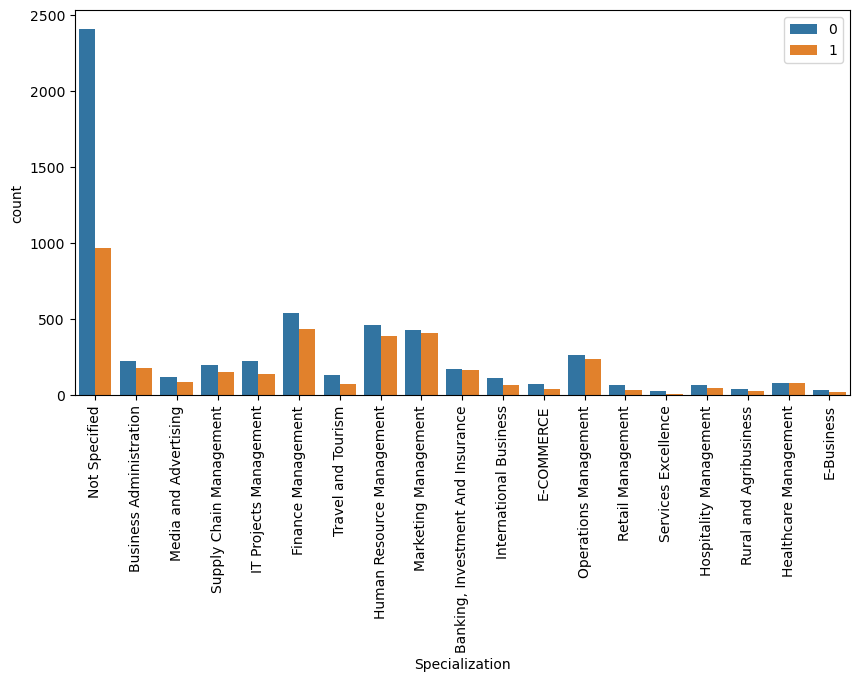

In [39]:
count_plot_converted(data.Specialization)

- Majority of conversion is from Not Specified.
- Specialization with something in Management tend to have higher number of leads. Therefore, they are significant variables and can not be dropped.

- We can combine Management Specializations because they show similar trends.
- We can replace specialization with low frequency with 'Other Specialization'.

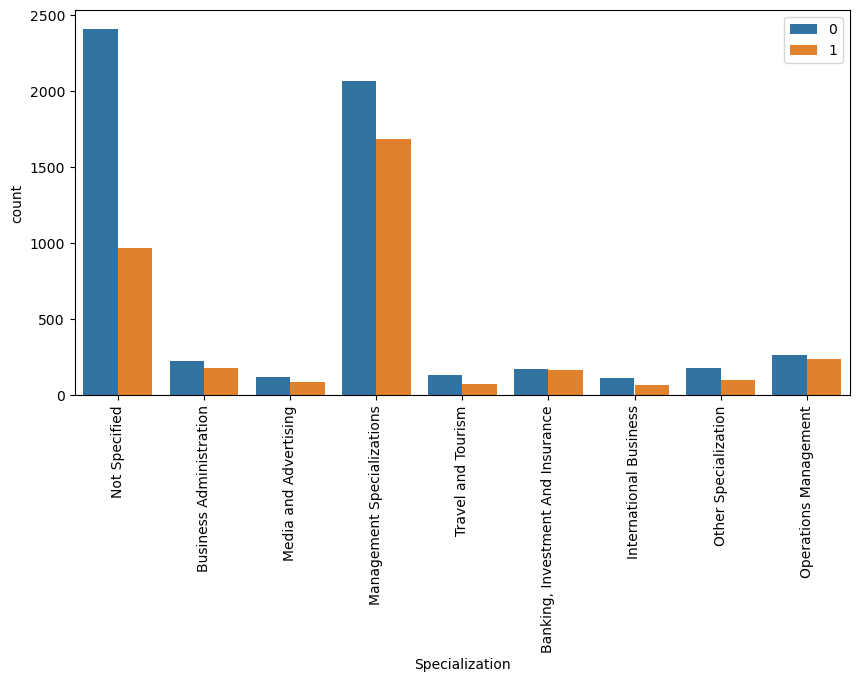

In [40]:
data['Specialization'] = data['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operation Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management Specializations')
data['Specialization'] = data['Specialization'].replace(['Services Excellence', 'E-Business', 'Rural and Agribusiness', 'E-COMMERCE'], 'Other Specialization')

count_plot_converted(data.Specialization)

### Tags

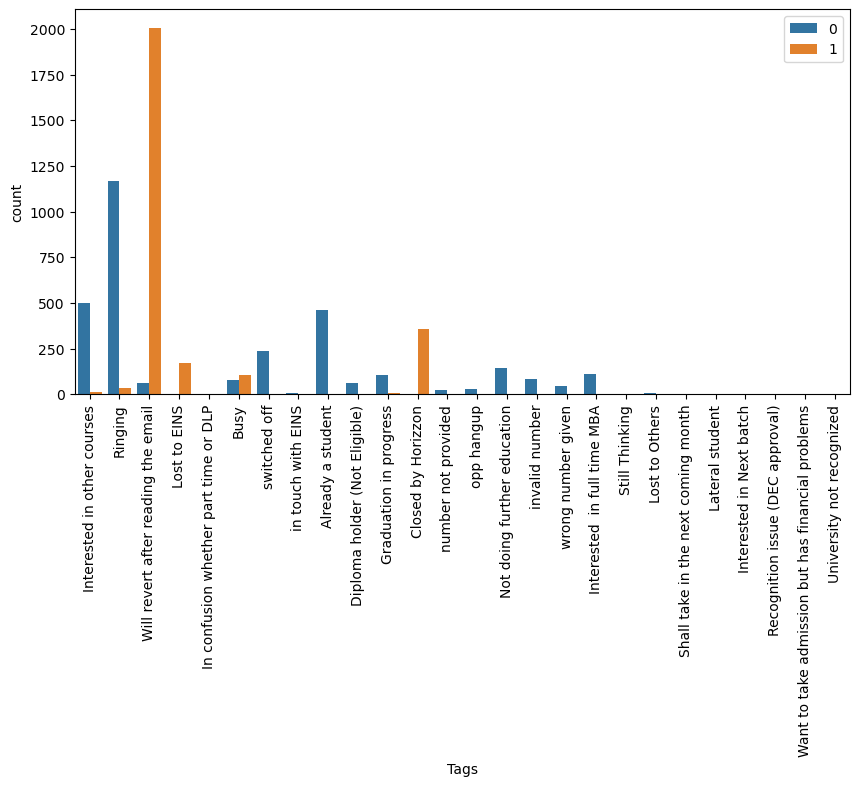

In [41]:
count_plot_converted(data.Tags)

Blanks in the tag column may be imputed by "Will revert after reading the email".

In [42]:
data['Tags'] = data['Tags'].fillna(data['Tags'].mode()[0])

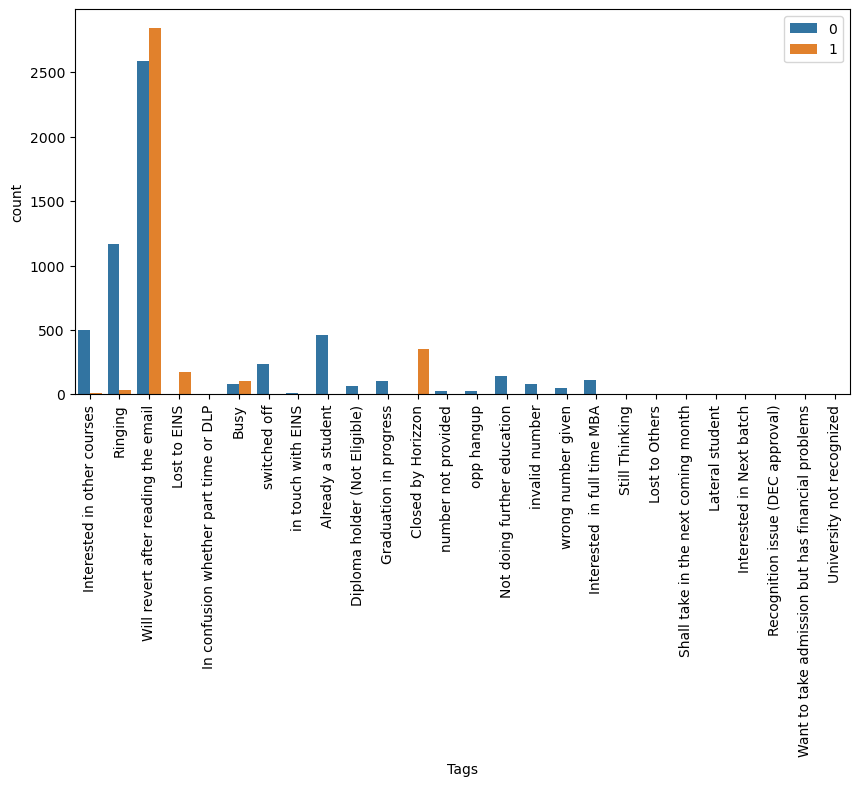

In [43]:
count_plot_converted(data.Tags)

The majority of convertion is from "Will revert after reading the email".

### What matters most to you in choosing a course

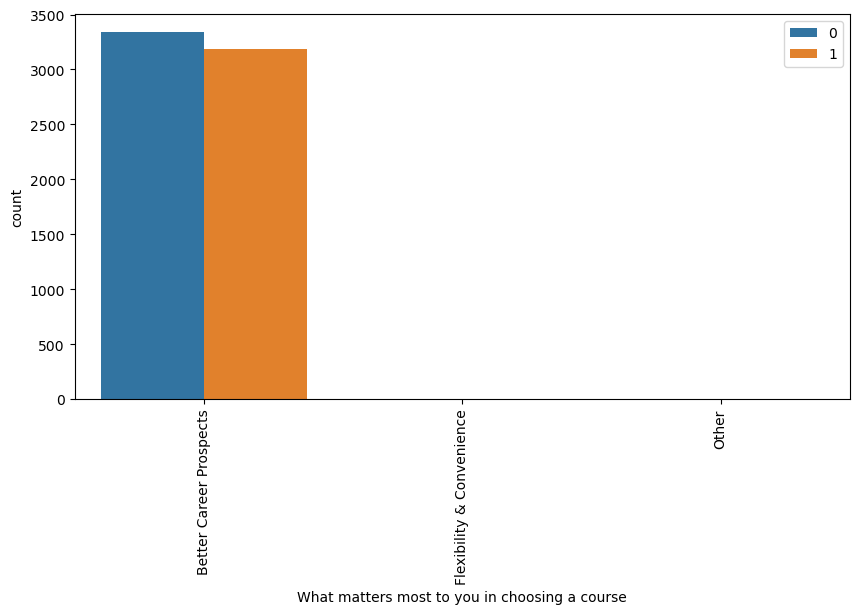

In [44]:
count_plot_converted(data['What matters most to you in choosing a course'])

The majority of data is 'Better Career Prospects', as the data is skewed, we can delete the column.

In [45]:
data = data.drop('What matters most to you in choosing a course', axis = 1)

### What is your current occupation

In [46]:
data['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

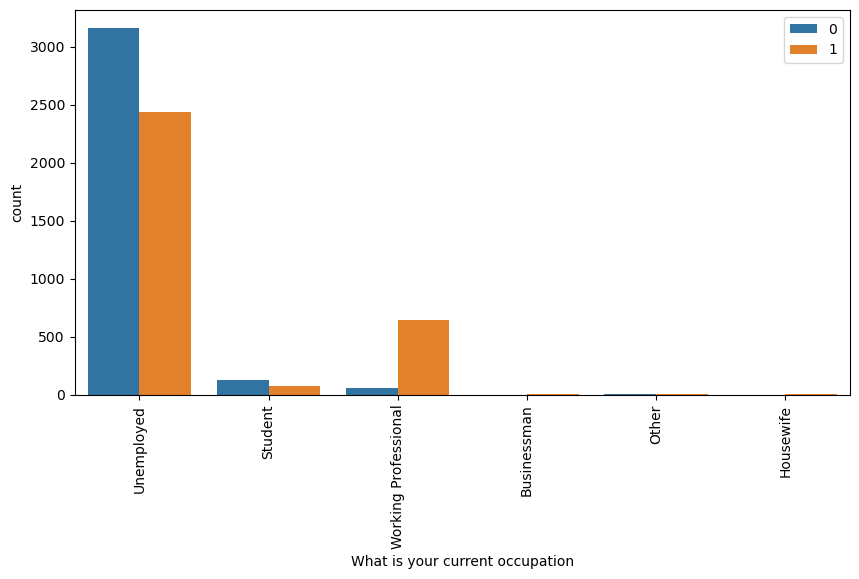

In [47]:
count_plot_converted(data['What is your current occupation'])

- About 85.5% leads are "Unemployed".
- If we impute the data as "Unemployed" then data will become more skewed. Therefore, we will impute the value as "Unknown".

In [48]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unknown')

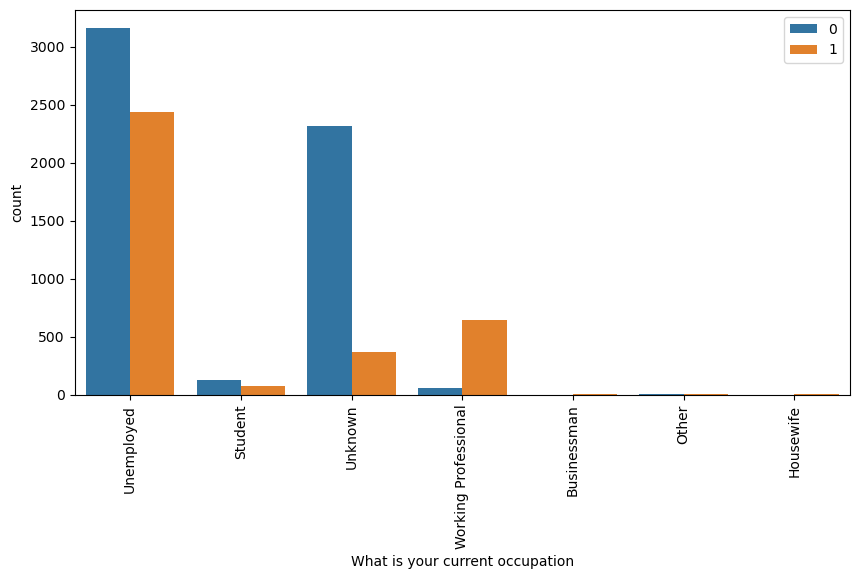

In [49]:
count_plot_converted(data['What is your current occupation'])

- The majority conversion is from Umemployed.
- Leads that are Working Professional have highest conversion rate.

In [50]:
# Checking the percentage of missing values

round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False).head(7)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Prospect ID                               0.00
X Education Forums                        0.00
A free copy of Mastering The Interview    0.00
dtype: float64

The rest of those columns that have missing values are under 2%, so we can drop these rows.

In [51]:
data.dropna(inplace=True)

In [52]:
# Rechecking the percentage of missing values

round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

### Lead Source

In [53]:
# Changing google to Google

data["Lead Source"] = data["Lead Source"].replace('google',"Google")

In [54]:
# Replacing NaN values and combining low frequency occuring labels under a common label 'Others'

data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call', 'Presee_Release',
                                                 'youtubechannel','welearnblog_Home',
                                                 'WeLearn','blog','Pay per Click Ads',
                                                 'testone','NC_EDM'], 'Others')

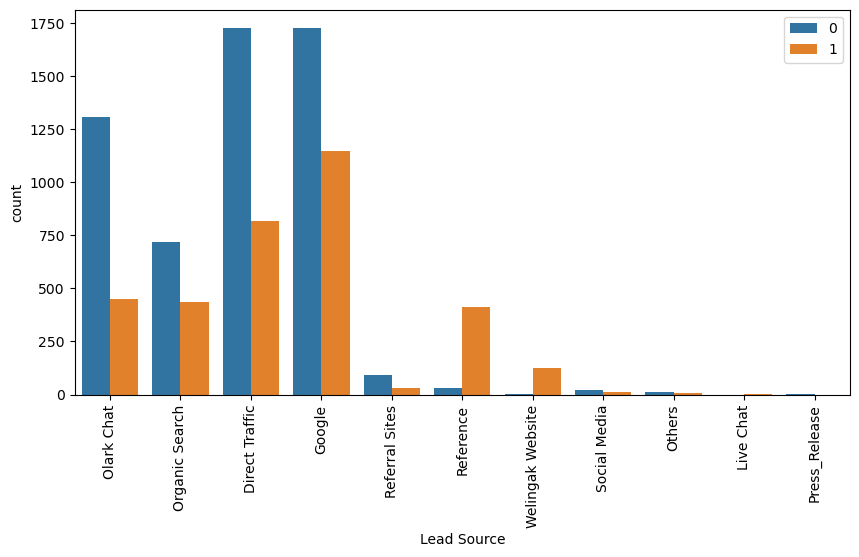

In [55]:
count_plot_converted(data['Lead Source'])

- Most of the leads are from Google and Direct Traffic.
- Conversion rate of Feference and Weilingak Website is high.

### Last Actitity

In [56]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [59]:
# Replacing NaN values and combining low frequency values

data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Approached upfront', 'Email Received',
                                                       'Email Marked Spam', 'Visited Booth in Tradeshow',
                                                       'Resubscribed to emails'],'Others')

In [60]:
data['Last Activity'].value_counts(dropna=False)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

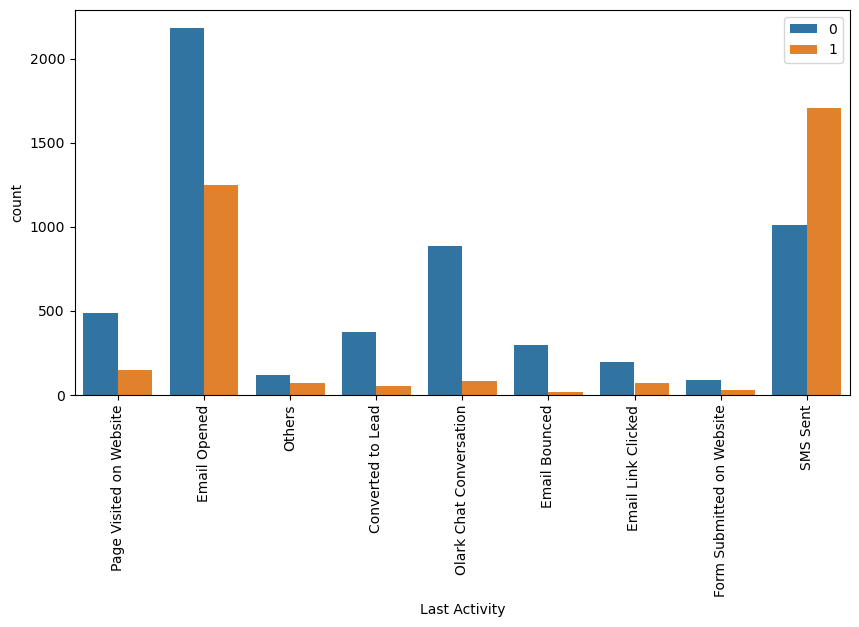

In [61]:
count_plot_converted(data['Last Activity'])

- Most of the leads have email opened, followed by SMS sent as their last acitivity.
- Conversion rate for leads with SMS sent as last activity is very high.

### Lead Origin

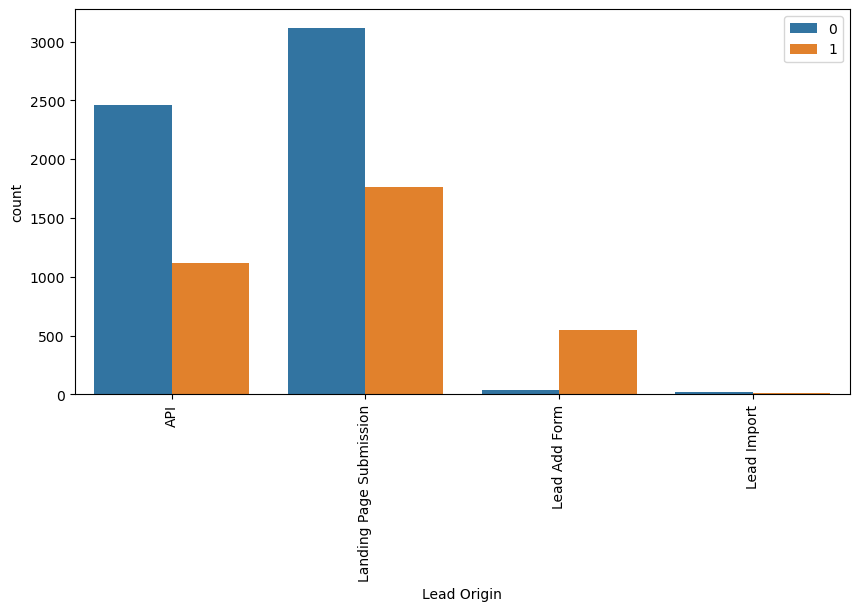

In [62]:
count_plot_converted(data['Lead Origin'])

- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate, but count of leads are not very high.
- Lead Import does not have many values and the conversion rate is also the lowest.
- To improve overall lead conversion rate, we have to improve lead conversion of API and Landing Page Submission origin, and generate more leads from Lead Add Form.

### Last Notable Activity

In [64]:
# Checking value counts of Last Notable Activity

data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [65]:
# Combing low frequency values

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Other Notable Activity')

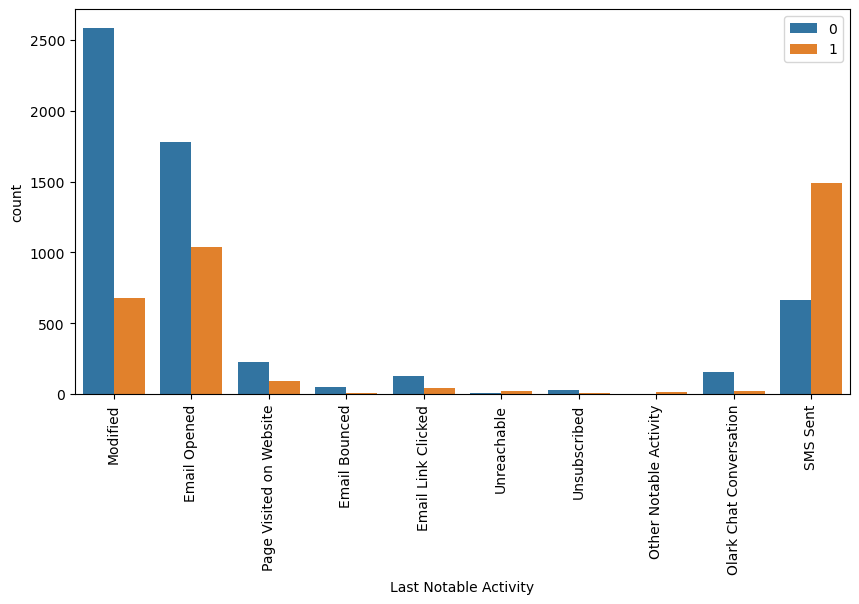

In [66]:
count_plot_converted(data['Last Notable Activity'])

## Deleting imbalanced columns

In [68]:
data.shape

(9074, 27)

In [71]:
data[["Prospect ID", "Lead Number"]].nunique()

Prospect ID    9074
Lead Number    9074
dtype: int64

'Prospect ID' and 'Lead Number' are all unique values. We can drop these columns.

In [72]:
data = data.drop(["Prospect ID", "Lead Number"],1)

In [73]:
# Identifying the value counts of the features

varList=['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
        'Get updates on DM Content', 'I agree to pay the amount through cheque']

for col in varList:
    print(data[col].value_counts(dropna=False))
    print("-"*50)

No    9074
Name: Magazine, dtype: int64
--------------------------------------------------
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
--------------------------------------------------
No    9074
Name: Update me on Supply Chain Content, dtype: int64
--------------------------------------------------
No    9074
Name: Get updates on DM Content, dtype: int64
--------------------------------------------------
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
--------------------------------------------------


These columns in varList have only 'No' as values. We can drop these columns.

In [74]:
data = data.drop(varList,1)